In [211]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

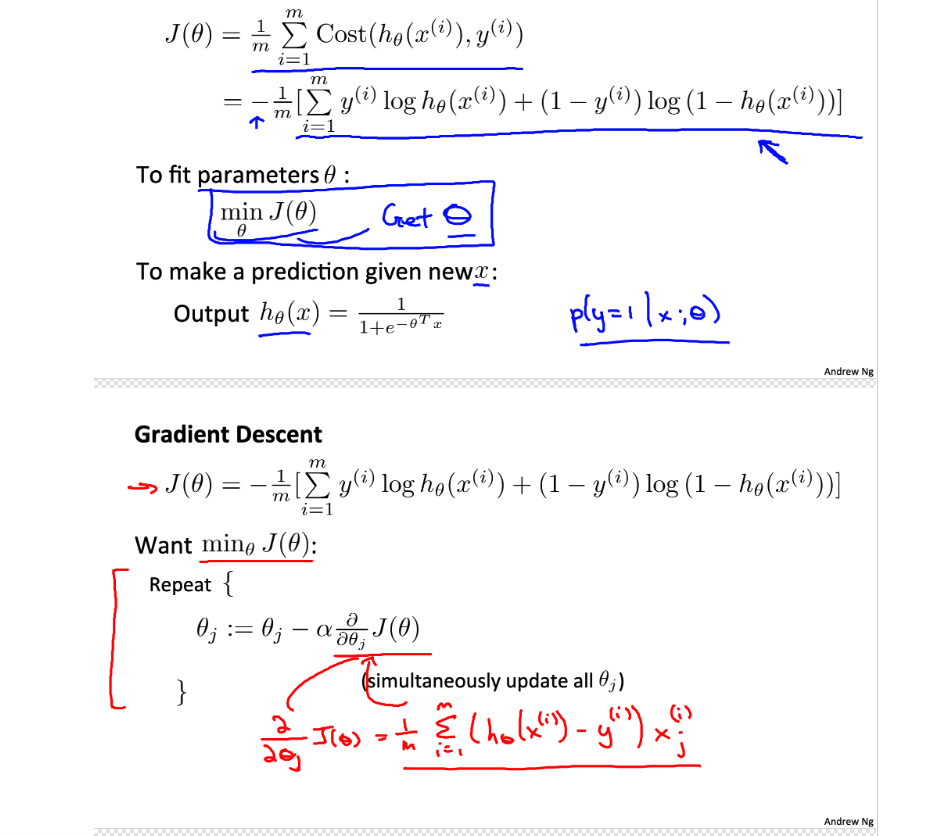

In [6]:
from IPython.core.display import Image 
Image(filename='/Users/mengxiangyu/Desktop/logistic regression.png')
#Plot function
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

In [128]:
#Sigmoid functioon
def logit(theta,x):
    return 1/(1+np.exp(-1*theta.dot(x)))
    

In [152]:
#linear gradient descent method function
#alpha is the study rate
#*args means the start points for parameter iterations
def gradient_descent(X, Y,alpha,num,*args):
    dim = X.shape[0]
    leng = X.shape[1]
    beta = []
    X_ = np.vstack((np.ones(leng),X))
    for arg in args:
        beta.append(arg)
    
    beta = np.array(beta)
    for i in range(num):
        beta = beta - alpha*(logit(beta,X_)-Y).dot(X_.T)/leng
    return beta

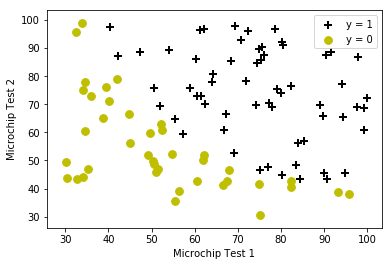

In [214]:
#Load the data from txt file
data = np.loadtxt('/Users/mengxiangyu/Downloads/Machine Learning Andrew Ng/machine-learning-ex2/ex2/ex2data1.txt', delimiter=",")
X=data[:,:2].T
Y = data[:,-1]
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
#Plot for linear seperated samples

In [201]:
#beta means parameter list here
beta=gradient_descent(X, Y,0.0001,1000000,[1,1,1])

[[1 1 1]]


In [199]:
#In sample test
X_ =  np.vstack((np.ones(X.shape[1]),X))
Y_test = [ 1 if p >0.5 else 0 for p in logit(beta,X_)]
Y_test[:20]

[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1]

In [200]:
#True target values
Y[:20]

array([0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 1.])

In [196]:
#Train accuarcy:
ac = 0
for i in range(len(Y)):
    if Y[i] == Y_test[i]:
        ac = ac +1
    else:
        continue
ac = ac/len(Y)
ac

0.89

In [226]:
#Logistic regression with regularization & Logistic Regression with
#non linear classification
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(6)


In [219]:
data2 = np.loadtxt('/Users/mengxiangyu/Downloads/Machine Learning Andrew Ng/machine-learning-ex2/ex2/ex2data2.txt', delimiter=",")
XX=data2[:,:2].T
YY = data2[:,-1]

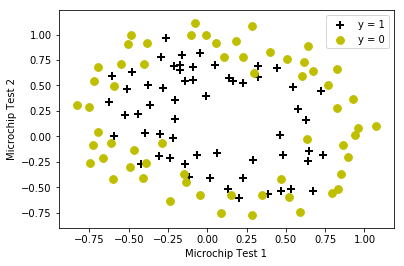

In [213]:
plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

In [233]:
poly.fit_transform(XX.T).T.shape

(28, 118)

In [261]:
def gradient_descent_reg(X, Y,alpha,num,lam,dim):
    poly = PolynomialFeatures(dim)
    X_ = poly.fit_transform(X.T).T
    leng = X_.shape[1]
    beta = []
    beta = np.ones(X_.shape[0])
    for i in range(num):
        beta = beta - alpha*((logit(beta,X_)-Y).dot(X_.T)/leng+lam/leng*beta)
    return beta

In [357]:
beta =gradient_descent_reg(XX,YY,0.001,100000,50,6)
beta

array([ 0.02367075, -0.02732086,  0.02013701, -0.10146103, -0.02595638,
       -0.06644261, -0.03145835, -0.01404218, -0.01653234, -0.03791937,
       -0.08103052, -0.00436962, -0.02637549, -0.00686971, -0.07454541,
       -0.03755721, -0.00881311, -0.00647189, -0.0117327 , -0.00958639,
       -0.05668683, -0.06372685, -0.00185141, -0.0132413 , -0.00065361,
       -0.01492521, -0.00303372, -0.07457294])

In [358]:
poly = PolynomialFeatures(6)
XX_ = poly.fit_transform(XX.T).T

In [359]:
#in sample test
YY_test = [ 1 if p >=0.5 else 0 for p in logit(beta,XX_)]

In [360]:
#target value
YY[:20]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [361]:
YY_test[:20]

[0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
#Train accuarcy:
def accuarcy(YY,YY_test):
    ac = 0;
    for i in range(len(YY)):
        if YY[i] == YY_test[i]:
            ac = ac +1
        else:
            continue
    ac = ac/len(YY)
    return ac

In [362]:
accuarcy(YY,YY_test)

0.652542372881356

In [373]:
#Find the lambda with highest in sample accuarcy
acc_list = []
for i in range(150):
    inte = i
    beta = gradient_descent_reg(XX,YY,0.001,10000,inte,6)
    YY_test1 = [ 1 if p >=0.5 else 0 for p in logit(beta,XX_)]
    #print(YY_test[:5])
    acc_list.append(accuarcy(YY,YY_test1))
    #print(accuarcy(YY,YY_test1))

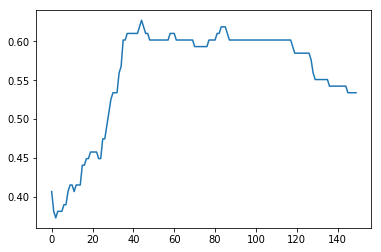

In [374]:
plt.plot(acc_list)